In [1]:
import pandas as pd
import scrapy as sp
import scipy as sc
import bs4 as bs
import statsmodels as sm
import os
import seaborn as sns
import sklearn

In [57]:
data_fb = pd.read_csv("Dataframe MMM test - Ark3.csv")
data_ga = pd.read_csv("Dataframe MMM test - Ark4.csv")

data_ga.drop(columns=['Account']).copy()

,union,Date,Cost,Clicks,Impressions
0,NaN,2023-05-14,0,0,0
1,NaN,2023-05-15,0,0,0
2,1.016608e+09,2023-01-01,"327,91",43,8226
3,1.016608e+09,2023-01-02,"673,46",42,8839
4,1.016608e+09,2023-01-03,"494,81",32,7739
...,...,...,...,...,...
203,1.016608e+09,2023-07-23,"394,27",40,7169
204,1.016608e+09,2023-07-24,"586,29",29,5927
205,1.016608e+09,2023-07-25,"354,29",32,3597
206,1.016608e+09,2023-07-26,"344,82",33,14690


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data_ga):
    # Drop column: 'Account'
    data_ga = data_ga.drop(columns=['Account'])
    return data_ga

data_ga_clean = clean_data(data_ga.copy())
data_ga_clean.head()

In [30]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data_ga):
    # Drop column: 'Account'
    data_ga = data_ga.drop(columns=['Account'])
    # Rename column 'union' to 'account_id'
    data_ga = data_ga.rename(columns={'union': 'account_id'})
    return data_ga

data_ga_clean = clean_data(data_ga.copy())
data_ga_clean.head()

,account_id,Date,Cost,Clicks,Impressions
0,NaN,2023-05-14,0,0,0
1,NaN,2023-05-15,0,0,0
2,1.016608e+09,2023-01-01,"327,91",43,8226
3,1.016608e+09,2023-01-02,"673,46",42,8839
4,1.016608e+09,2023-01-03,"494,81",32,7739


In [32]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(result):
    # Drop rows with missing data in column: 'Date_x'
    result = result.dropna(subset=['Date'])
    return result

result_clean = clean_data(result.copy())
result_clean.to_csv("cleanData.csv")

                                             |          | [  0%]   00:00 -> (? left)


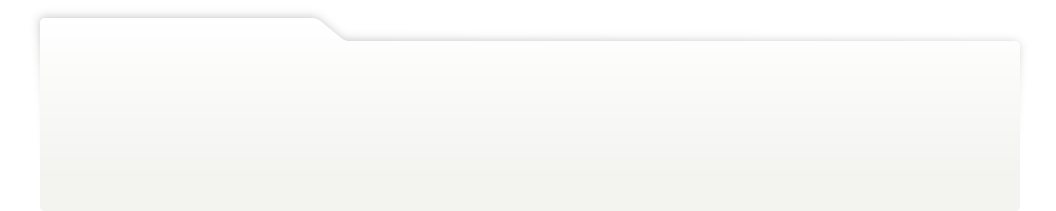
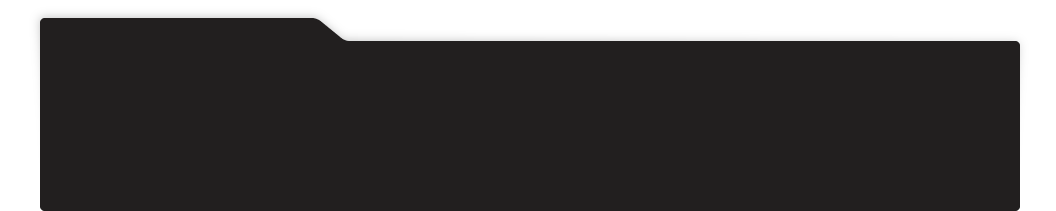
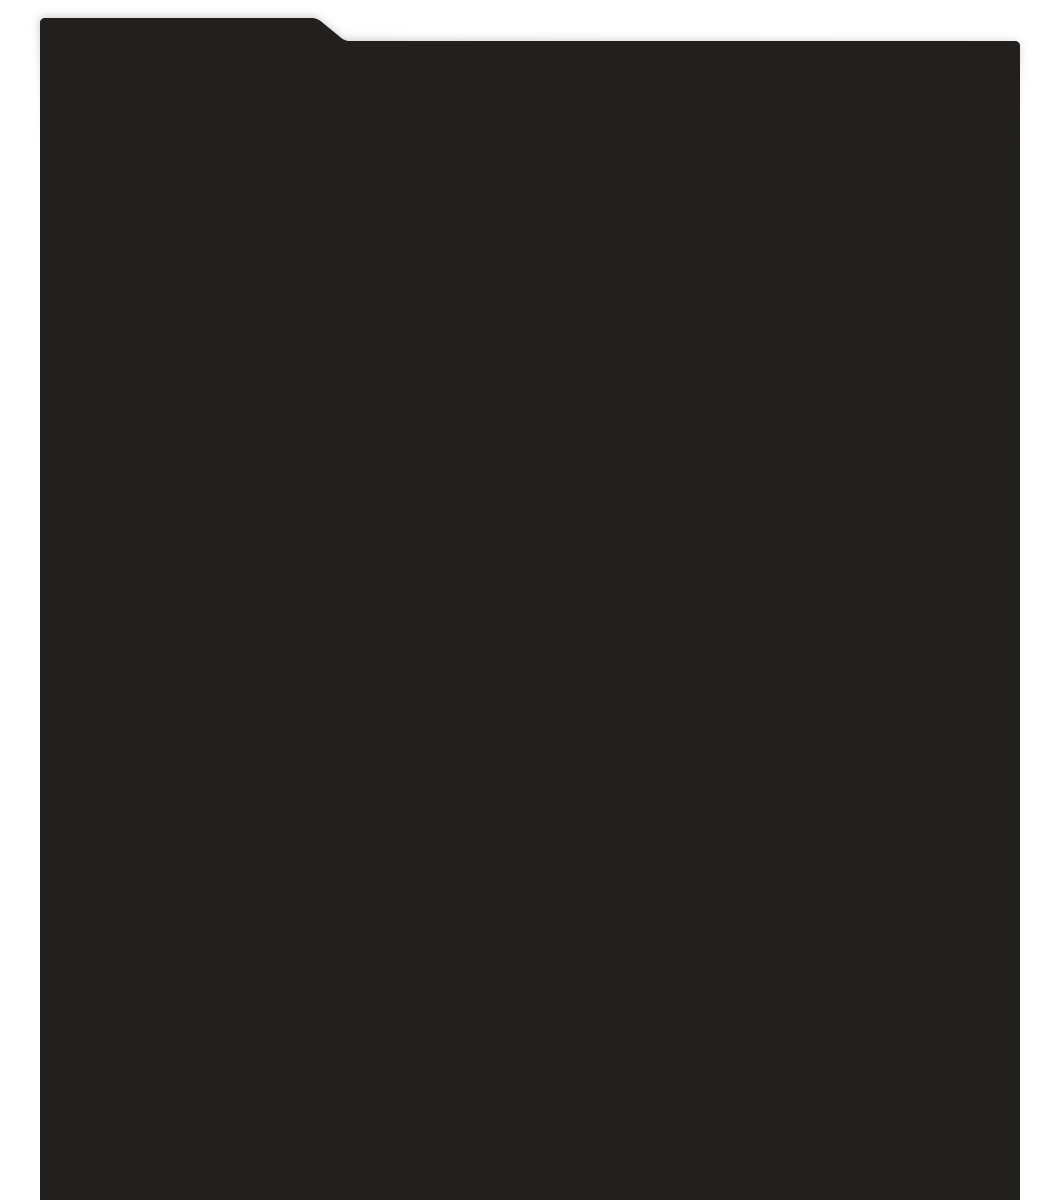
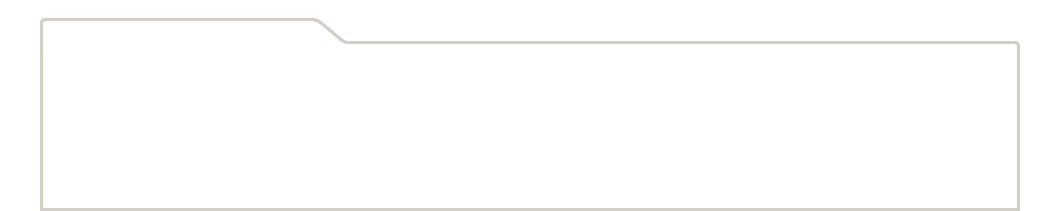
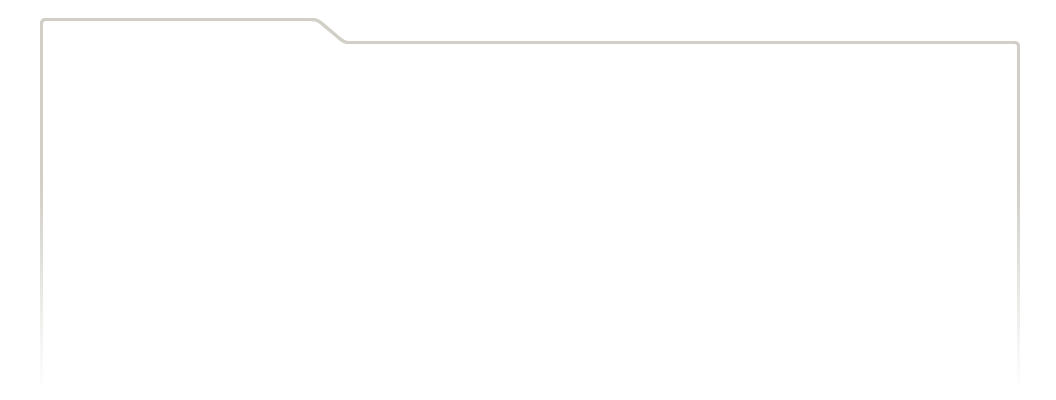
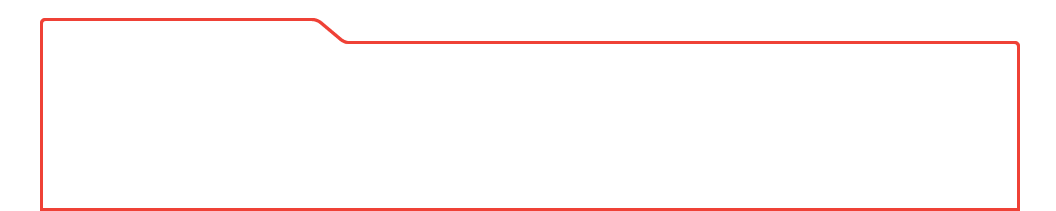
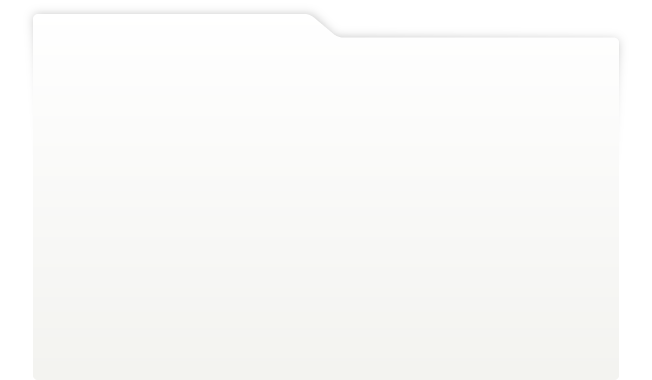
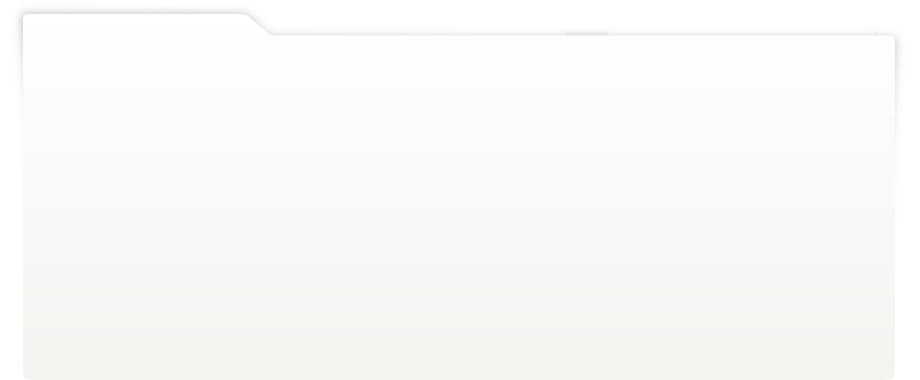
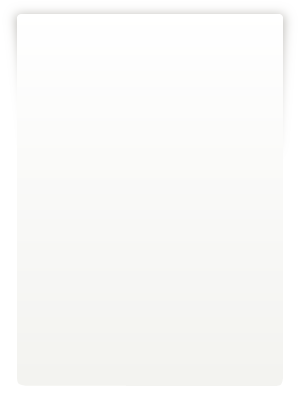
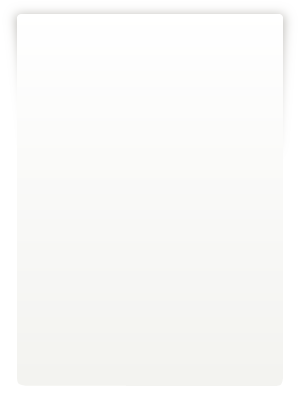
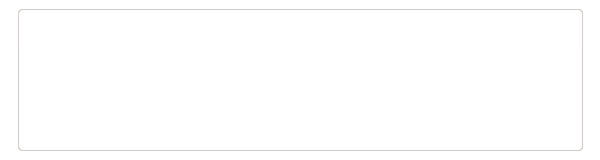
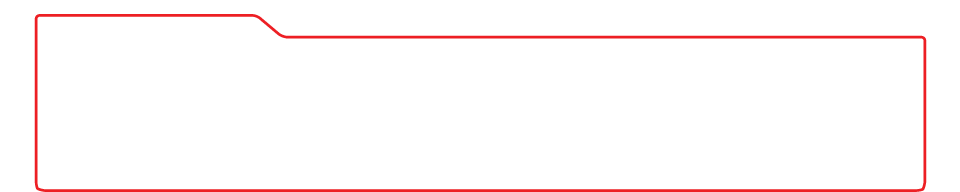
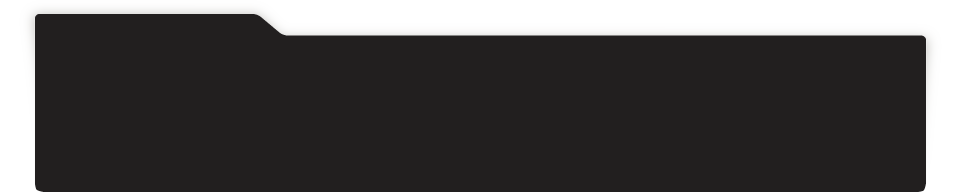
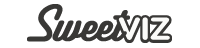
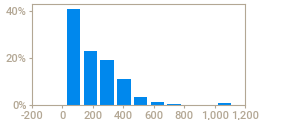
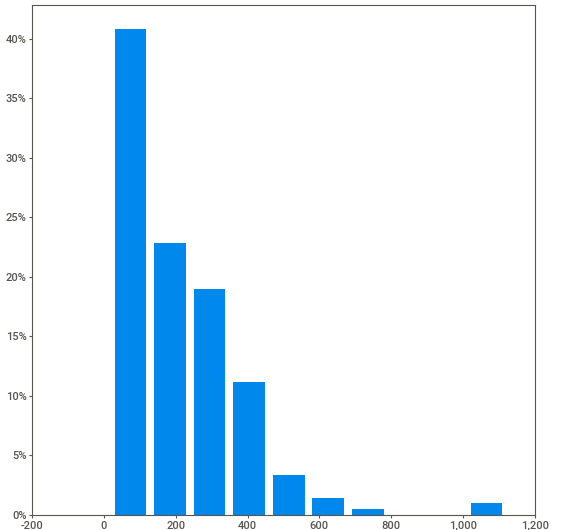
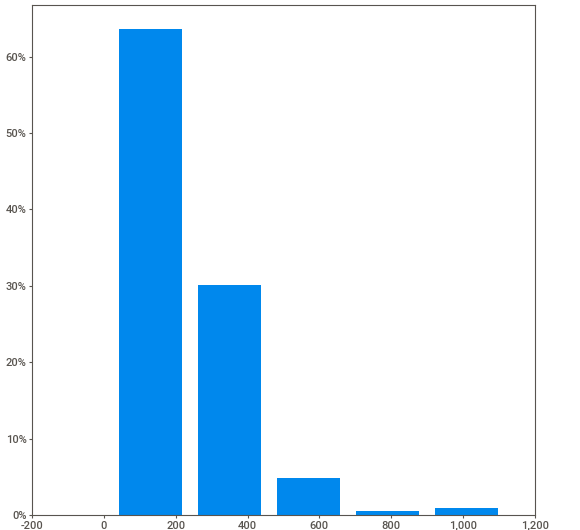
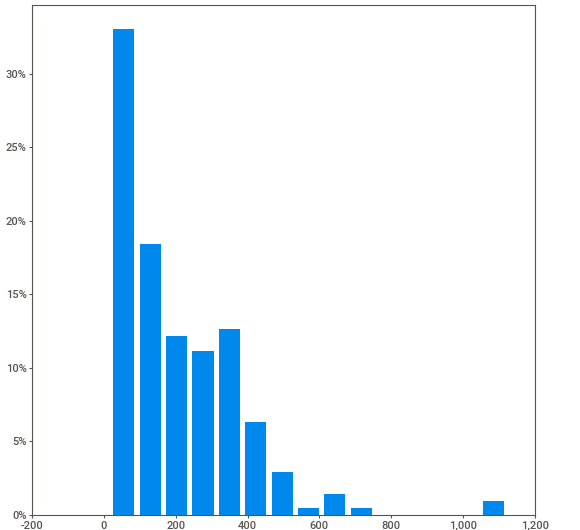
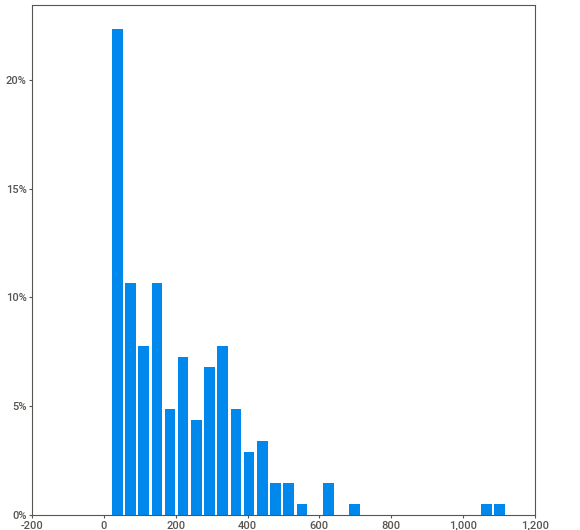
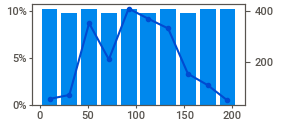
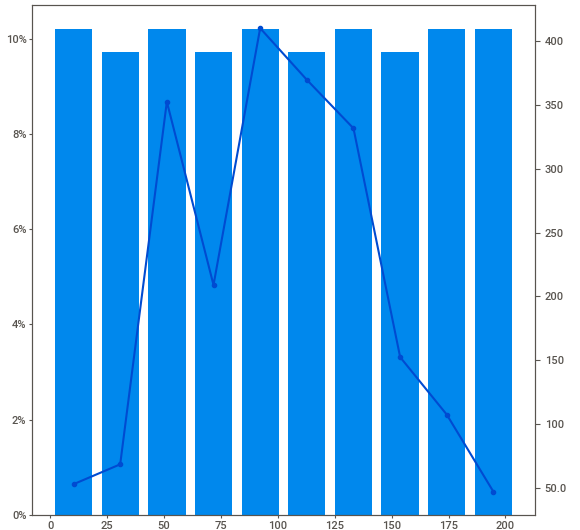
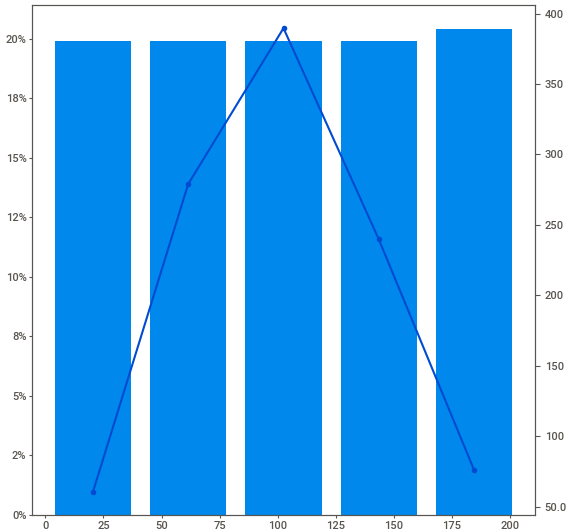
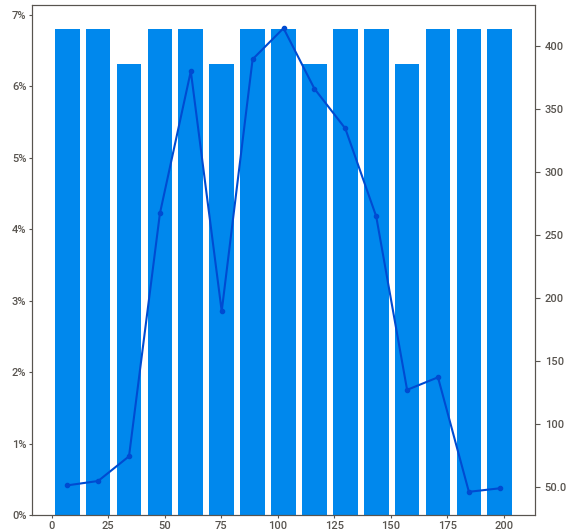
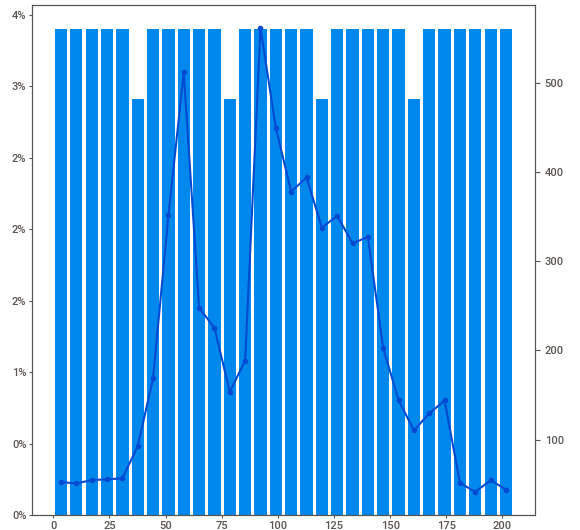
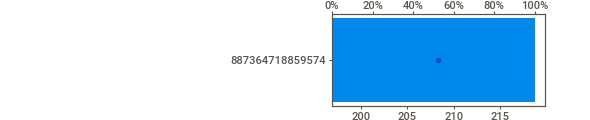
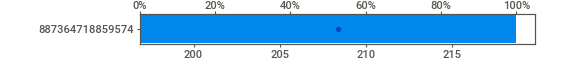
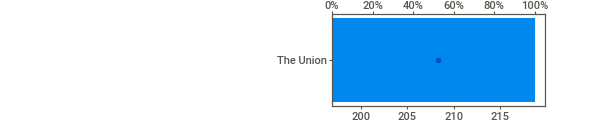
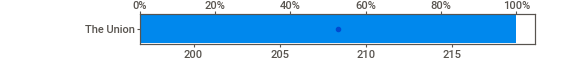
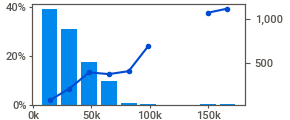
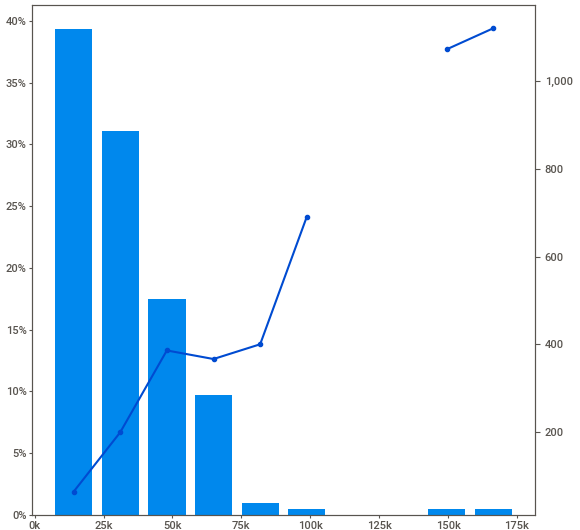
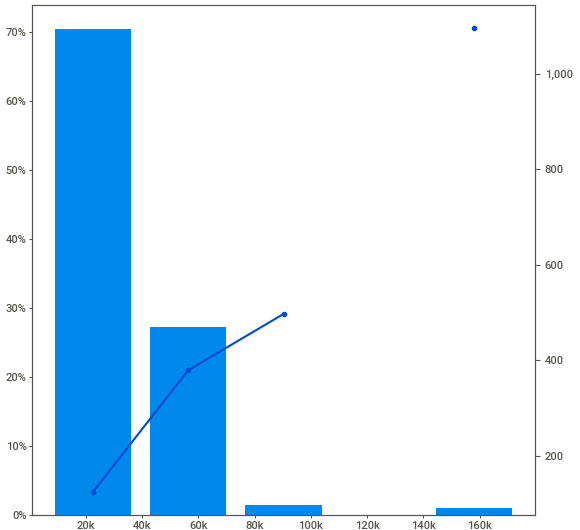
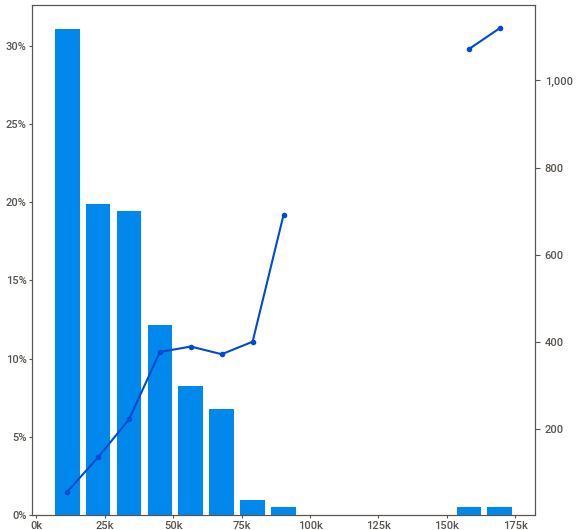
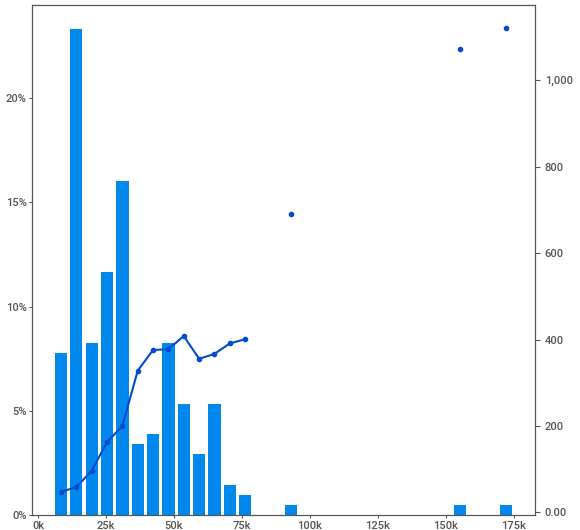
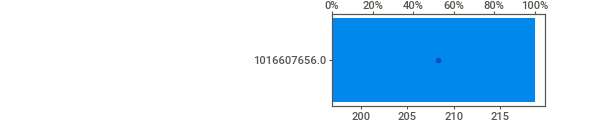
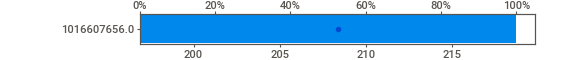
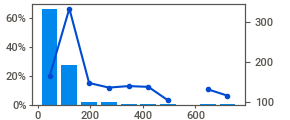
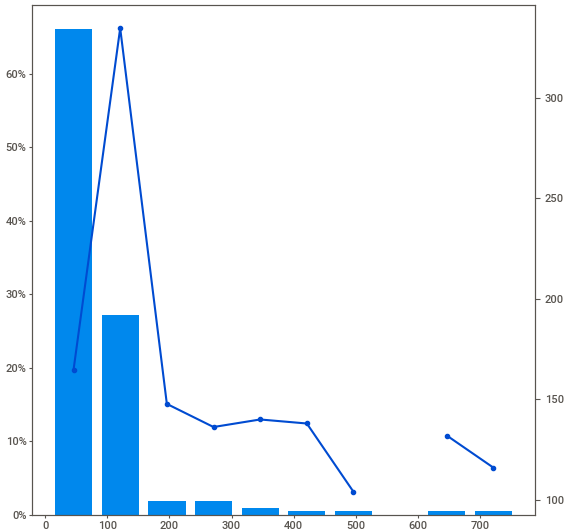
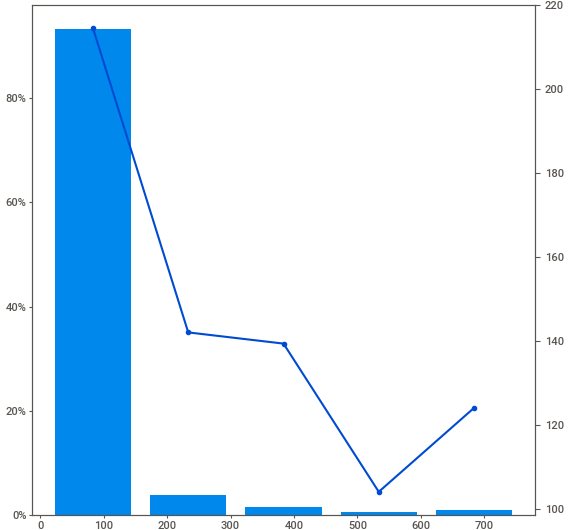
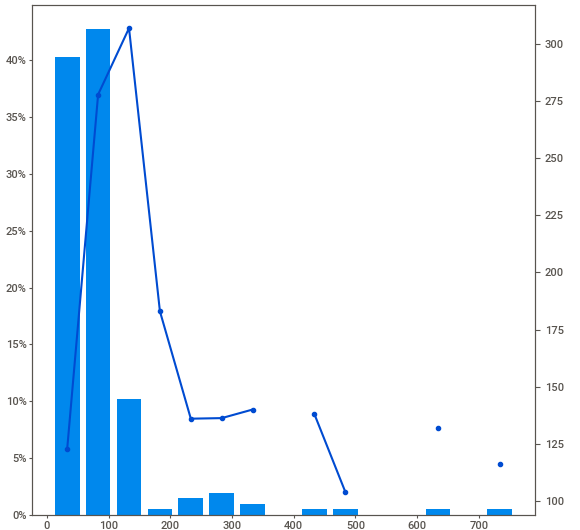
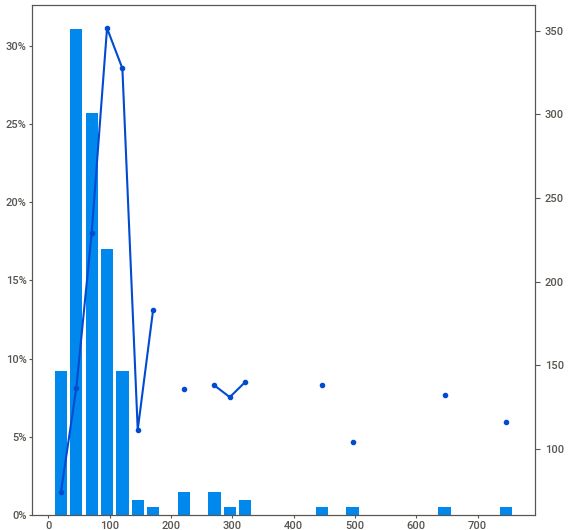
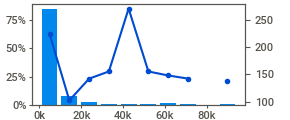
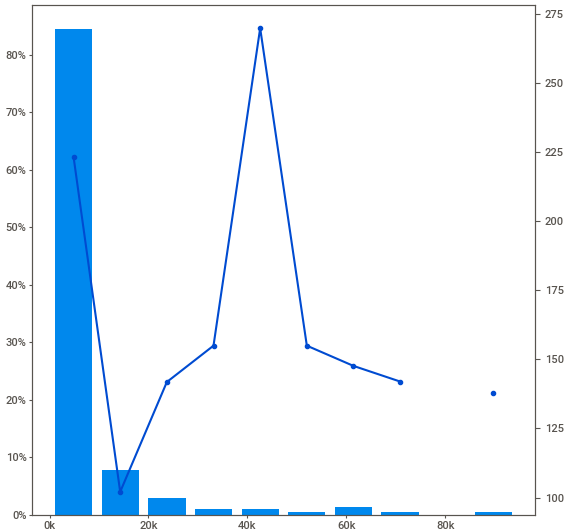
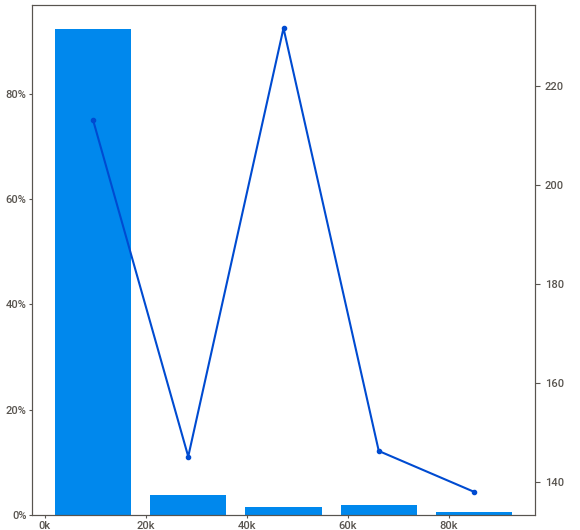
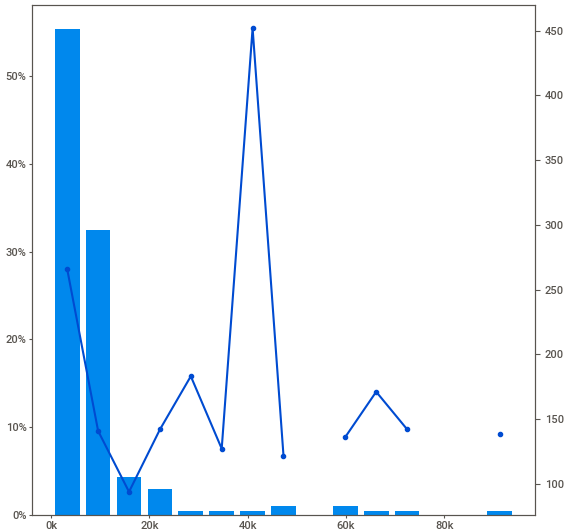
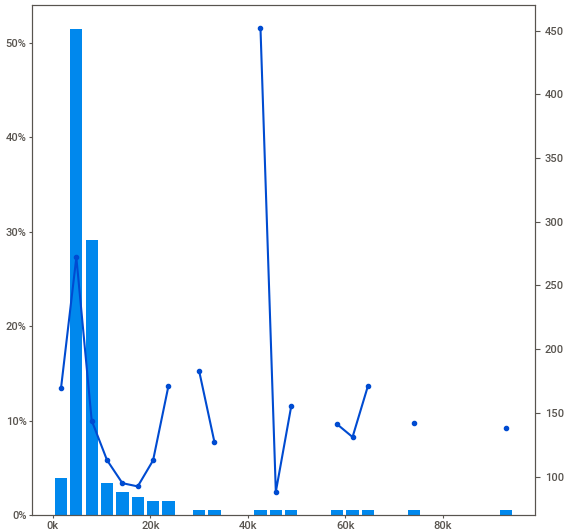
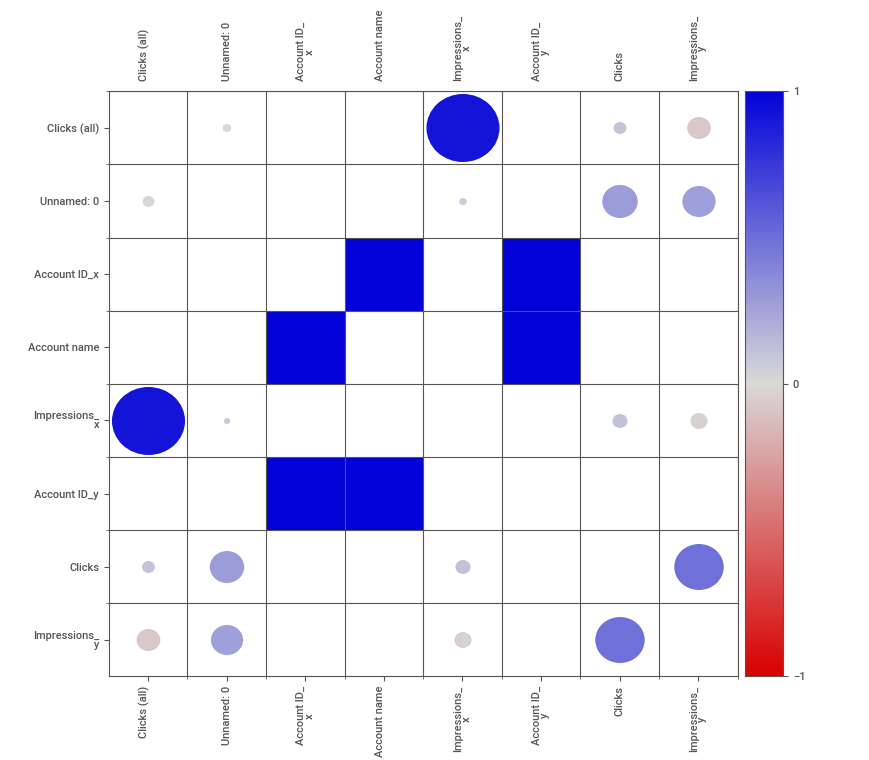
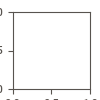

In [33]:
import pandas as pd
import sweetviz as sv
from sklearn.model_selection import train_test_split
dataframe = pd.read_csv("cleanData.csv")

#dataframe.head()

report = sv.analyze([dataframe, "Train"], target_feat="Clicks (all)")
report.show_notebook(w="100%", h=750)



In [34]:
new_df = pd.read_csv("/Users/fs/opt/Jupyter notebooks/google-ads-python/dummyData - Sheet3.csv")

new_df.head()

,Date,Session medium,Event count
0,2023-01-01,(none),12
1,2023-01-01,(not set),1
2,2023-01-01,UNG,1
3,2023-01-01,cpc,24
4,2023-01-01,organic,4


In [35]:
import pandas as pd

# Sample DataFrame with the "Medium" column
data = {
    'Session medium': ["(none)", "(not set)", "UNG", "cpc", "organic", "social", "referral"]
}

df = pd.DataFrame(new_df)

# Define the mapping function
def map_medium_to_category(medium):
    if medium in ["(none)", "(not set)"]:
        return "Direct"
    elif medium == "cpc":
        return "Paid"
    elif medium == "social":
        return "Social"
    elif medium == "organic":
        return "Organic"
    elif medium == "Session medium":  # Include the new category
        return "Session Medium"
    else:
        return medium  # If none of the specified categories match, keep the original value

# Create the derived column using the mapping function
df['Derived_Category'] = df['Session medium'].apply(map_medium_to_category)

# Display the result
df


,Date,Session medium,Event count,Derived_Category
0,2023-01-01,(none),12,Direct
1,2023-01-01,(not set),1,Direct
2,2023-01-01,UNG,1,UNG
3,2023-01-01,cpc,24,Paid
4,2023-01-01,organic,4,Organic
...,...,...,...,...
995,2023-06-26,organic,5,Organic
996,2023-06-26,referral,8,referral
997,2023-06-27,(none),15,Direct
998,2023-06-27,U18,3,U18


In [13]:
df['Derived_Category'].value_counts('Derived_Category' == "Direct")

Direct      255
Paid        178
referral    175
Organic     171
Social      102
U18          73
UNG          24
e-mail       12
Landrute      4
display       3
chat          3
Name: Derived_Category, dtype: int64